<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [70]:
# import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [71]:

df = pd.read_csv("data.csv",sep = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [72]:
categorical = [i for i in df.columns if df[i].dtype == pd.StringDtype]

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [73]:
df.head(100)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [74]:
for i in df.columns:
    df = df[df[i] != ' ?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [75]:
X = df.drop(["income"],axis=1)
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [76]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=[i for i in df.drop(["income"],axis=1).columns if df[i].dtype == pd.StringDtype])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteri

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

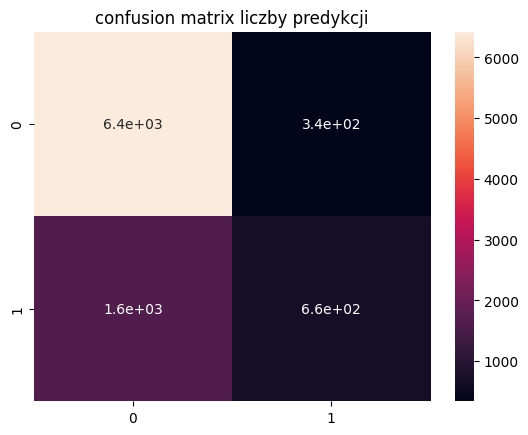

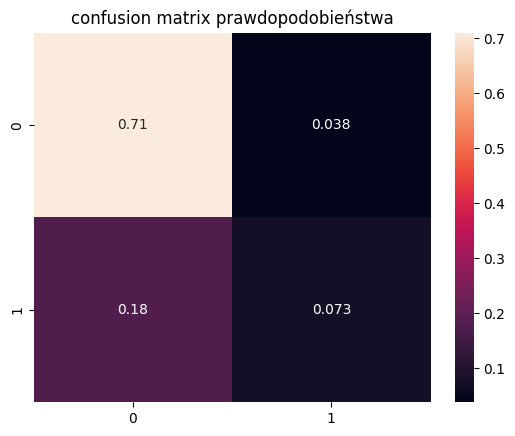

In [77]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
plt.title("confusion matrix liczby predykcji")
sns.heatmap(matrix, annot=True)
plt.show()
plt.title("confusion matrix prawdopodobieństwa")
sns.heatmap(matrix/len(y_test), annot=True)
plt.show()

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


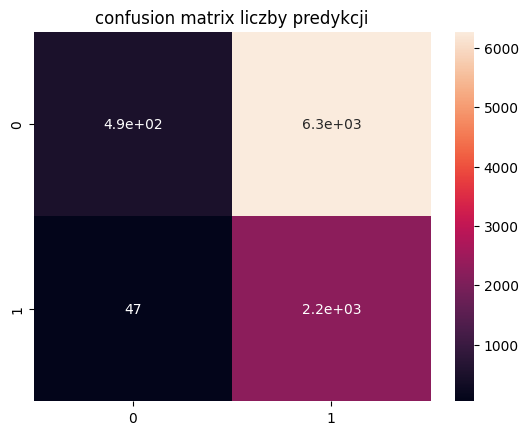

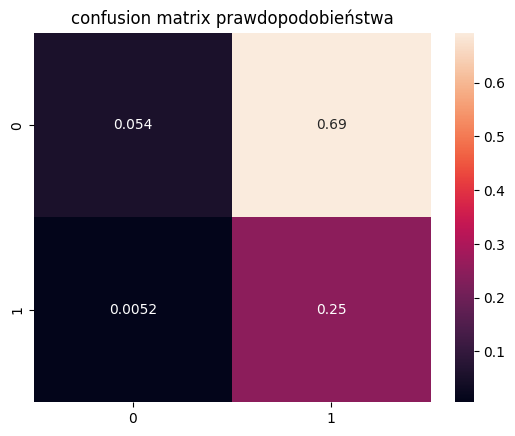

In [78]:
X = df[["race","native_country"]]
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder(cols=[i for i in df[["race","native_country"]].columns if df[i].dtype == pd.StringDtype])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


# instantiate the model

gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
plt.title("confusion matrix liczby predykcji")
sns.heatmap(matrix, annot=True)
plt.show()
plt.title("confusion matrix prawdopodobieństwa")
sns.heatmap(matrix/len(y_test), annot=True)
plt.show()

### Wnnioski
wyniki metody zależą od częstotliwości występowania danych neutralnie klasyfikowanych (posiadających równe prawdopodobieństwo występowania w obydwóch zbiorach). Naiwny klasyfikator bayesowski w znacznym stopniu podnosi efektywność klasyfikacji obiektów które nie są równomiernie reprezentowane w zbiorze uczącym. Z uwagi na charakterystyczne działanie metody które bierze pod uwagę nie tylko informacje o danej instancji ale także i o aproksymowanej wielkości całego zbioru można uzyskać lepsze wyniki klasyfikacji niż np dla modelu regresji logistycznej.